# AML
## Exercise Sheet 05

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (a)

In [4]:
# Set the number of simulations and fishermen
T = 10000
nb_fishermen = 1000

# Initialize arrays to store the fractions of red fish for each strategy
mu_f1 = np.zeros(T)
mu_fr = np.zeros(T)
mu_fstar = np.zeros(T)

# Probability of catching a red fish
mu = 0.5

In [5]:
# Run the simulation T times
for t in range(T):
    # Simulate the catch for each fisherman: 0 for green, 1 for red
    catches = np.random.binomial(1, mu, (nb_fishermen, 10))

    # Calculate the fraction of red fish for the first fisherman
    mu_f1[t] = np.mean(catches[0])

    # Pick a random fisherman and calculate the fraction of red fish
    random_fisherman = np.random.randint(0, nb_fishermen)
    mu_fr[t] = np.mean(catches[random_fisherman])

    # Find the fisherman with the minimum frequency of red fish
    min_red_fish = np.argmin(np.mean(catches, axis=1))
    mu_fstar[t] = np.mean(catches[min_red_fish])

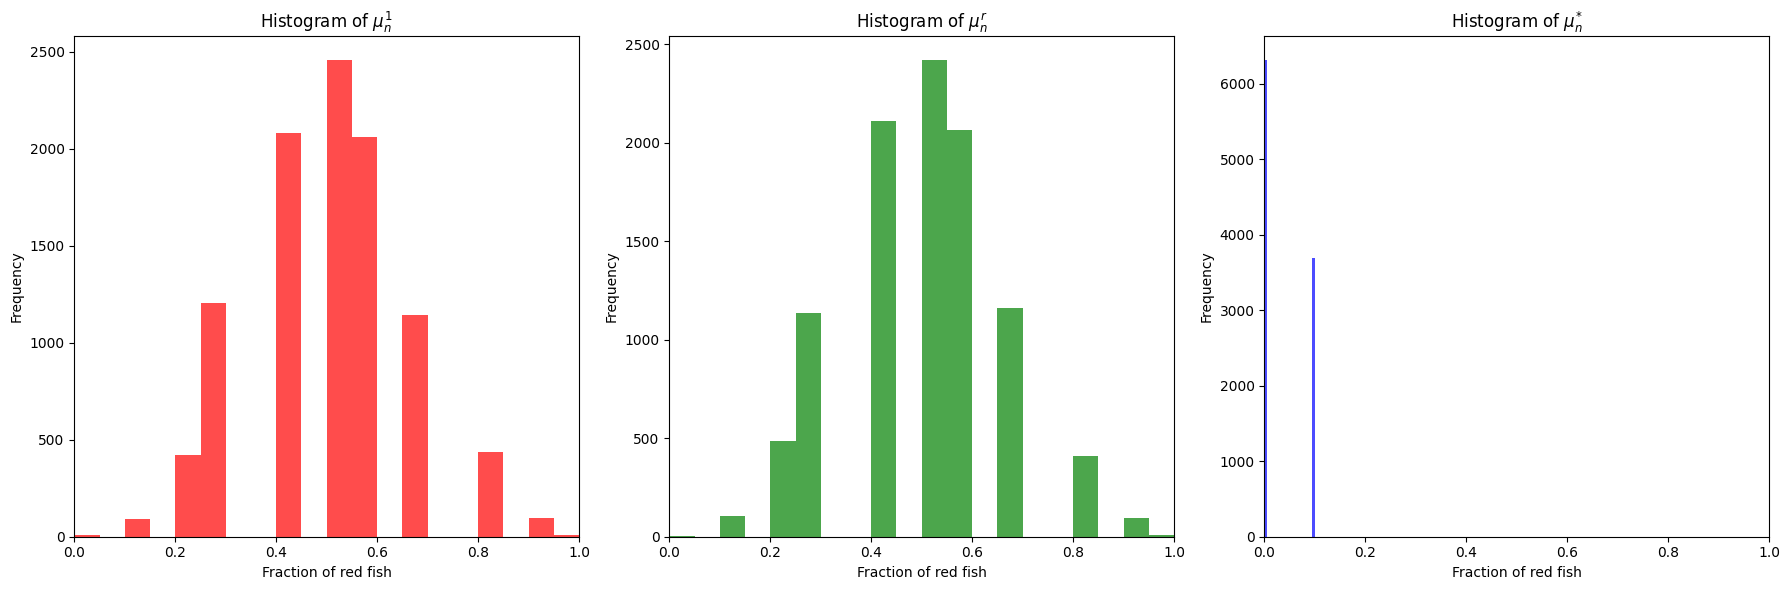

In [11]:
nb_bins = 20

x_min = 0.0
x_max = 1.0

# Plot the histograms
plt.figure(figsize=(18, 6))

# Histogram for f1
plt.subplot(1, 3, 1)
plt.hist(mu_f1, bins=nb_bins, color='red', alpha=0.7)
plt.title("Histogram of $μ_n^{1}$")
plt.xlabel("Fraction of red fish")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)  # Set the x-axis limits

# Histogram for fr
plt.subplot(1, 3, 2)
plt.hist(mu_fr, bins=nb_bins, color='green', alpha=0.7)
plt.title("Histogram of $μ_n^{r}$")
plt.xlabel("Fraction of red fish")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)  # Set the x-axis limits

# Histogram for f*
plt.subplot(1, 3, 3)
plt.hist(mu_fstar, bins=nb_bins, color='blue', alpha=0.7)
plt.title("Histogram of $μ_n^{*}$")
plt.xlabel("Fraction of red fish")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)  # Set the x-axis limits

plt.tight_layout()
plt.show()

## (b)

In [12]:
# Function to calculate the empirical probability
def empirical_prob(mu_array, mu, epsilon):
    return np.mean(np.abs(mu_array - mu) >= epsilon)

In [13]:
# Values of epsilon to test
epsilon_values = np.linspace(0, 1, 100)

# Calculate empirical probabilities for each strategy
emp_probs_f1 = [empirical_prob(mu_f1, mu, eps) for eps in epsilon_values]
emp_probs_fr = [empirical_prob(mu_fr, mu, eps) for eps in epsilon_values]
emp_probs_fstar = [empirical_prob(mu_fstar, mu, eps) for eps in epsilon_values]

# Calculate the Hoeffding bound for each epsilon
hoeffding_bound = [2 * np.exp(-2 * 10 * eps**2) for eps in epsilon_values]

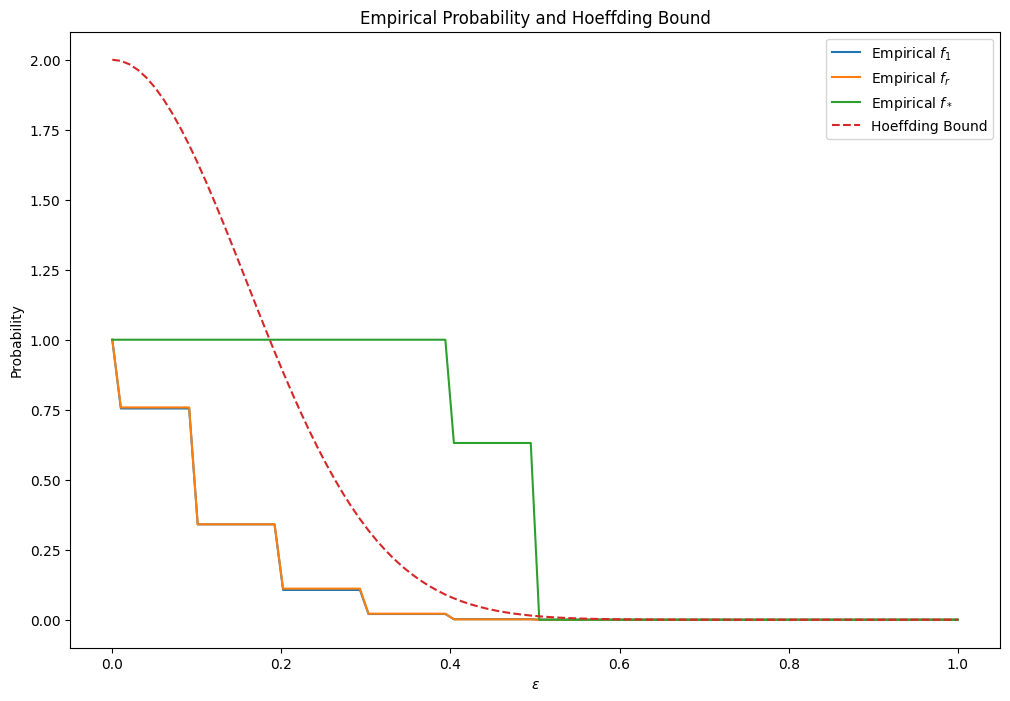

In [14]:
# Plot the estimates and the Hoeffding bound
plt.figure(figsize=(12, 8))

plt.plot(epsilon_values, emp_probs_f1, label="Empirical $f_1$")
plt.plot(epsilon_values, emp_probs_fr, label="Empirical $f_r$")
plt.plot(epsilon_values, emp_probs_fstar, label="Empirical $f_*$")
plt.plot(epsilon_values, hoeffding_bound, label="Hoeffding Bound", linestyle='--')

plt.title("Empirical Probability and Hoeffding Bound")
plt.xlabel("$\epsilon$")
plt.ylabel("Probability")
plt.legend()
plt.show()